<a href="https://colab.research.google.com/github/Fizza-Rehman049/Spam-classifier/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Command to read data set
df=pd.read_csv('emails.csv')

In [ ]:
#Print 5 sample from dataset
df.sample(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
669,Email 670,7,22,6,14,5,0,444,1,1,...,0,0,0,2,0,0,0,5,0,1
4266,Email 4267,7,11,1,1,1,2,39,11,0,...,0,0,0,0,0,0,0,0,0,0
749,Email 750,0,0,1,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
3442,Email 3443,17,12,5,25,6,8,155,1,1,...,0,0,0,1,0,0,0,5,0,1
162,Email 163,0,1,1,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Row and Column of Dataset
df.shape

(5172, 3002)

**Data cleaning**

In [ ]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
# prompt: code for finding null data
df.isnull().sum()


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
#printing dataset
print(df)

       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...       0.0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...       0.0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...       0.0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...       0.0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...       0.0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
1729  Email 1730   10   7    1    4    0   3   32    4    1  ...       0.0   
1730  Email 1731    0   1    2    0    0   1    7    0    0  ...       0.0   
1731  Email 1732    0   1    1    0    1   0    8    0    0  ...       0.0   
1732  Email 1733    0   0    1    0    0   0    0    0    0  ...       0.0   
1733  Email 1734    0   0    1    0    1   0    2    0    0  ...       NaN   

      jay  valued  lay  infrastructure  military  allowing   ff

In [ ]:
#code for removing missing values
df.dropna(subset=['ff'], inplace=True)

In [ ]:
#code for finding null values
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
#code for looking values in dataset
df.isnull()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1729,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# code to show categorical column
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)


Categorical columns: ['Email No.']


In [ ]:
# prompt: code for numerical column

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_columns)


Numerical columns: ['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'com', 'as', 'from', 'gas', 'or', 'not', 'me', 'deal', 'if', 'meter', 'hpl', 'please', 're', 'e', 'any', 'our', 'corp', 'can', 'd', 'all', 'has', 'was', 'know', 'need', 'an', 'forwarded', 'new', 't', 'may', 'up', 'j', 'mmbtu', 'should', 'do', 'am', 'get', 'out', 'see', 'no', 'there', 'price', 'daren', 'but', 'been', 'company', 'l', 'these', 'let', 'so', 'would', 'm', 'into', 'xls', 'farmer', 'attached', 'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what', 'only', 'http', 'th', 'volume', 'mail', 'contract', 'which', 'month', 'more', 'robert', 'sitara', 'about', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'now', 'their', 'file', 'some', 'email', 'just', 'also', 'call', 'change', 'other', 'here', 'like', 'b', 'flow', 'net', 'fo

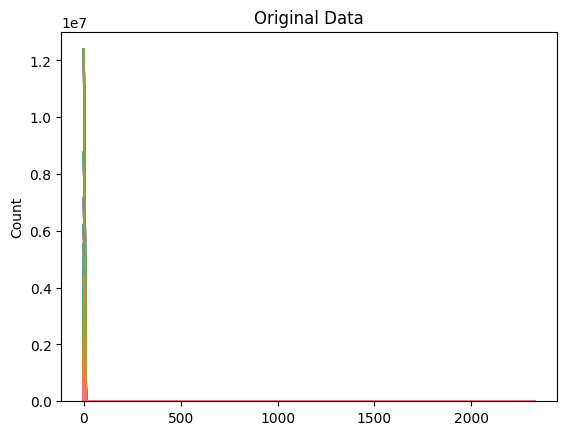

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(1, 1)  # Create a single subplot

# Assuming 'df' is your DataFrame
sns.histplot(df, ax=ax, kde=True, legend=False)
ax.set_title("Original Data")
plt.show()

In [ ]:
# code to show numerical column in data
numerical_columns = df.select_dtypes(include=['int']).columns.tolist()
print("Numerical Column:", numerical_columns)

Numerical Column: []


In [ ]:
# prompt: scale the data and plot hist plot for it

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int']).columns.tolist()

scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Plot the hist plot
fig, ax = plt.subplots(1, 1)
sns.histplot(df, ax=ax, kde=True, legend=False)
ax.set_title("Scaled Data")
plt.show()


ValueError: at least one array or dtype is required

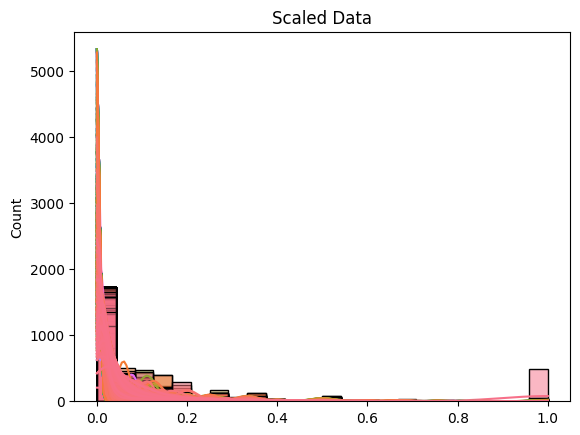

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (assuming they are of numeric types)
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

# Scale the data
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Plot the hist plot
fig, ax = plt.subplots(1, 1)
sns.histplot(df, ax=ax, kde=True, legend=False)
ax.set_title("Scaled Data")
plt.show()

In [ ]:
#code for finding the mean median mode of data
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,...,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,0.032020,0.047959,0.016041,0.036096,0.083892,0.033071,0.030932,0.061825,0.015545,0.048186,...,0.003174,0.002116,0.003462,0.008271,0.001923,0.002885,0.002308,0.008828,0.008656,0.278130
std,0.056537,0.073386,0.054153,0.070634,0.123526,0.073092,0.050147,0.107247,0.054536,0.080937,...,0.041497,0.032956,0.044820,0.050930,0.037519,0.053652,0.033903,0.029627,0.092658,0.448207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004762,0.007576,0.000000,0.000000,0.025641,0.000000,0.006849,0.000000,0.000000,0.008969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.014286,0.022727,0.002915,0.012048,0.051282,0.012987,0.015806,0.023810,0.000000,0.022422,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.038095,0.053030,0.011662,0.036145,0.102564,0.025974,0.033720,0.071429,0.011976,0.053812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008772,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Spam emails: 6.800000000000001
Non-spam emails: 1726.2
Total emails: 1733


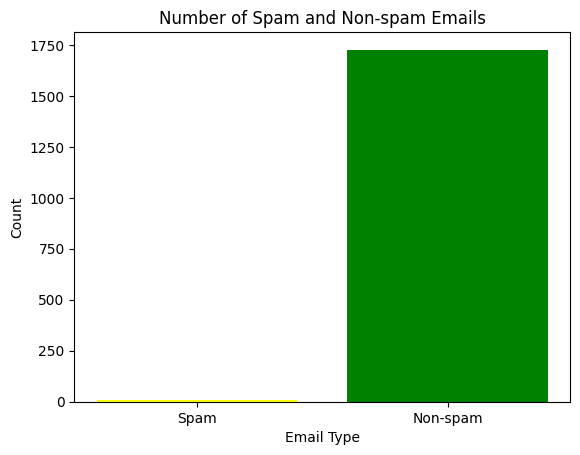

In [ ]:
#code for ploting the count of spam and not spam email
spam_count = sum(df['spam'])
non_spam_count = len(df) - spam_count
total_emails = len(df)
print("\nSpam emails:", spam_count)
print("Non-spam emails:", non_spam_count)
print("Total emails:", total_emails)

categories = ['Spam', 'Non-spam']
counts = [spam_count, non_spam_count]

plt.bar(categories, counts, color=['yellow', 'green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Number of Spam and Non-spam Emails')
plt.show()

<ipython-input-26-e14665d275f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['the'])


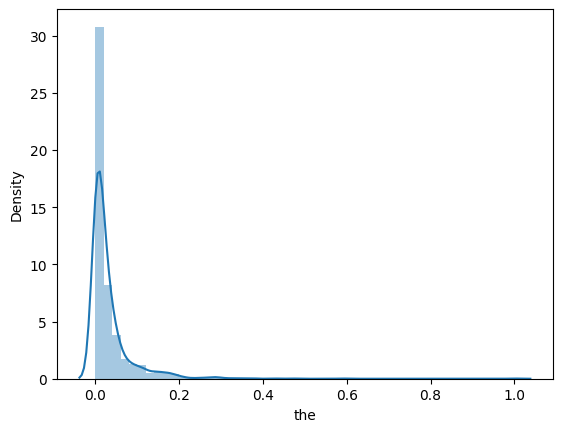

In [ ]:
# make dist plot for the columnn
sns.distplot(df['the'])
plt.show()


<ipython-input-27-765de240d0e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['to'])


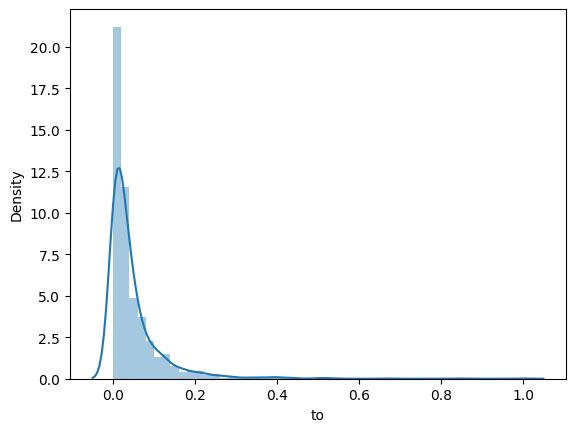

In [ ]:
sns.distplot(df['to'])
plt.show()

In [ ]:
X = df.iloc[:, :3000]

In [ ]:
# code to print the shape of x

print(X.shape)


(1733, 3000)


In [ ]:
y = df.iloc[:, -1]

In [ ]:
#code to print the shape of y
print(y.shape)

(1733,)


In [ ]:
# code to encode the categoical column:
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of object (string) type
        X[column] = label_encoder.fit_transform(X[column])

In [ ]:
#Code to split tain and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training Naive Baise Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Testing
nb_pred = nb_classifier.predict(X_test)

In [ ]:
#Printing Accuracy of Naive Baise
nb_Accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuacy:", accuracy_score (y_test, nb_pred))

Naive Bayes accuacy: 0.9020172910662824


In [ ]:
#Printing NB Precision
nb_precision = precision_score(y_test, nb_pred)
print("Naive Bayes Precision:", nb_precision)


Naive Bayes Precision: 0.8607594936708861


**Decision** **Tree**

In [ ]:
# Training decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Testing
dt_pred = dt_classifier.predict(X_test)

In [ ]:
#Printing Accuracy of Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.899135446685879


In [ ]:
dt_precision = precision_score(y_test, dt_pred)
print("Decision Tree Precision:", dt_precision)


Decision Tree Precision: 0.78


In [ ]:
# Training Naive Baise Classifier
LG_classifier = LogisticRegression()
LG_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LG_pred = LG_classifier.predict(X_test)

In [ ]:
LG_precision = precision_score(y_test, LG_pred)
print("Logistic Regression Precision:", LG_precision)

Logistic Regression Precision: 0.9767441860465116


In [ ]:
LG_accuracy = accuracy_score(y_test, LG_pred)
print("Logistic Regression Accuracy:", LG_accuracy)

Logistic Regression Accuracy: 0.9740634005763689


**Random** **Forest**

In [ ]:
# Training Naive Baise Classifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RF_pred = RF_classifier.predict(X_test)

In [ ]:
RF_accuracy = accuracy_score(y_test, RF_pred)
print("Random Forest Accuracy:", RF_accuracy)

Random Forest Accuracy: 0.968299711815562


In [ ]:
RF_Precision = accuracy_score(y_test, RF_pred)
print("Random Forest Precision:", RF_Precision)

Random Forest Precision: 0.968299711815562
